***Nama: Raden Mas Bagus Mahesa Amandira***

***NIM: 2502033986***

***1. Pemilihan Dataset***

Data: Broken egg (https://www.kaggle.com/datasets/frankpereny/broken-eggs?rvi=1)
Data ini adalah kumpulan gambar telur dengan kondisi baik, pecah, dan kosong. Dataset dibagi menjadi dua, yaitu train dan test, dan masing-masing directory dibagi menjadi tiga yaitu crack, empty, dan good.

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import image_dataset_from_directory
from tensorflow.keras import models, layers, datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

Data Preprocessing

Data di sini sudah dibagi menjadi train dan test, sehingga data test dapat dibagi dua menggunakan train_test_split menjadi test dan val

In [ ]:
#Siapkan variabel untuk data preprocessing
path_train = '/content/drive/MyDrive/egg/test'
path_test = '/content/drive/MyDrive/egg/train'
imgsize = (200,150)
target = {"crack" : 0, "empty" : 1, "good" : 2}
x_train = []
x_test = []
x_val = []
x_temp = []

y_train = []
y_test = []
y_val = []
y_temp = []

Found 27 files belonging to 3 classes.


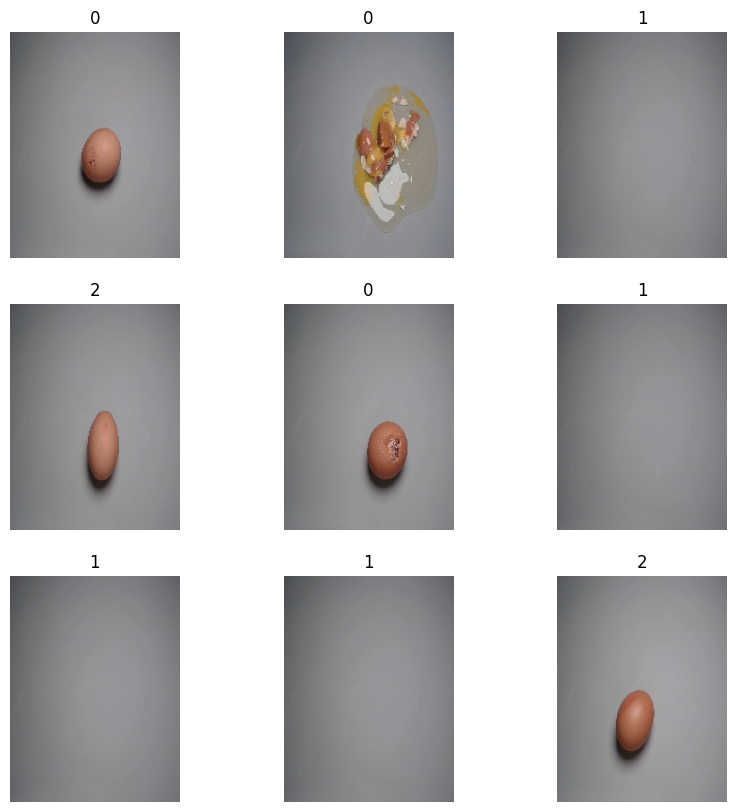

In [ ]:
#Perlihatkan foto untuk mendapatkan gambaran dataset

data = image_dataset_from_directory(path_train, image_size=(200,150))

plt.figure(figsize=(10, 10))
for images, labels in data:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
#Buat dataframe untuk train
for i in target:
    img_folder = os.path.join(path_train,i)
    for j in os.listdir(img_folder):
        img_path = os.path.join(img_folder,j)
        img = cv2.imread(img_path)
        img = cv2.resize(img,imgsize)
        x_train.append(img)
        y_train.append(target[i])

In [ ]:
#Buat dataframe untuk test dan val
for i in target:
    img_folder = os.path.join(path_test,i)
    for j in os.listdir(img_folder):
        img_path = os.path.join(img_folder,j)
        img = cv2.imread(img_path)
        img = cv2.resize(img,imgsize)
        x_temp.append(img)
        y_temp.append(target[i])

In [ ]:
#Convert data jadi numpy array supaya bisa fitting model
x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)
x_temp = np.array(x_temp)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)
y_temp = np.array(y_temp)

In [ ]:
#Train test split
x_test,x_val,y_test,y_val = train_test_split(x_temp,y_temp,test_size = 0.5)

***2. Pembuatan model***

Model yang dibuat adalah CNN dengan layer convolution2D dan maxpooling2D.

Convolution 2D bekerja dengan cara melakukan perkalian berdasarkan elemen data dua dimensi, hasil dari perkalian dijumlahkan untuk menghasilkan satu output. Dimensi dari setiap data cenderung berkurang setiap kali kita menambah layer, sehingga jumlah neuron dapat ditambahkan. Dapat dilihat pada hidden layer pertama terdapat 64 neuron, dan kemudian terdapat 128 neuron.

Kemudian diperlukan dense layer pada bagian akhir untuk mengubah output tensor (dalam tiga dimensi) menjadi satu dimensi. Kemudian kita dapat memberikan output layer.

In [ ]:
cnn = models.Sequential()
#input layer
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 200, 3)))

#hidden layer
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Conv2D(64,(3,3),activation = "relu"))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Conv2D(128,(3,3),activation = "relu"))
cnn.add(layers.MaxPooling2D((2,2)))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(64,activation = "relu"))

#output layer
cnn.add(layers.Dense(3,activation = "softmax"))

In [ ]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 23, 128)       0

***3. Pelatihan Model***
Parameter yang diseuaikan pada pelatihan model adalah jumlah epoch = 50. Parameter lain menggunakan value default. Contohnya batch size =  32.

In [ ]:
history = cnn.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 10s 10s/step - loss: 6.7422 - accuracy: 0.3704 - val_loss: 302.7060 - val_accuracy: 0.3690
Epoch 2/50
1/1 [==============================] - 7s 7s/step - loss: 321.1988 - accuracy: 0.3704 - val_loss: 184.1429 - val_accuracy: 0.2989
Epoch 3/50
1/1 [==============================] - 8s 8s/step - loss: 198.2195 - accuracy: 0.2593 - val_loss: 46.6784 - val_accuracy: 0.2989
Epoch 4/50
1/1 [==============================] - 5s 5s/step - loss: 51.0754 - accuracy: 0.2593 - val_loss: 46.9959 - val_accuracy: 0.3690
Epoch 5/50
1/1 [==============================] - 8s 8s/step - loss: 46.1617 - accuracy: 0.3704 - val_loss: 5.0761 - val_accuracy: 0.3321
Epoch 6/50
1/1 [==============================] - 7s 7s/step - loss: 4.4736 - accuracy: 0.3704 - val_loss: 5.3823 - val_accuracy: 0.2989
Epoch 7/50
1/1 [==============================] - 12s 12s/step - loss: 5.6723 - accuracy: 0.2593 - val_loss: 7.6353 - val_accuracy: 0.3690
Epoch 8/50
1/1 [====================

**4. Evaluasi Model**

Model memiliki akurasi 81.18% saat digunakan pada data testing.

Model juga memiliki loss 1.207

In [ ]:
test_loss, test_accuracy = cnn.evaluate(x_test, y_test)
print("test loss  :", test_loss)
print("test acc   :", test_accuracy)

9/9 [==============================] - 5s 539ms/step - loss: 1.2073 - accuracy: 0.8118
test loss  : 1.2073372602462769
test acc   : 0.8118081092834473


***5. Visualisasi***

Kita melakukan visualisasi dari feature map dan filter. Dapat dilihat feature map melakukan ekstraksi dari feature telur. Layers dapat mengenali fitur-fitur seperti jika telur pecah, kosong, atau normal.

Kita juga dapat melihat loss cenderung turun dan akurasi cenderung naik pada setiap iterasi saat kita melakukan pelatihan model. Model yang baik seharusnya tidak memiliiki jarak nilai yang jauh antara training, validasi, dan testing.

In [ ]:
for layer in cnn.layers:
    if 'conv' not in layer.name:
        continue
    filter , bias = layer.get_weights()
    print(layer.name , filter.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 64)
conv2d_2 (3, 3, 64, 128)


In [ ]:
filters , bias = cnn.layers[2].get_weights()

In [ ]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [ ]:
for i in range(len(cnn.layers)):
    layer = cnn.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i , layer.name , layer.output.shape)

0 conv2d (None, 148, 198, 32)
2 conv2d_1 (None, 72, 97, 64)
4 conv2d_2 (None, 34, 46, 128)


In [ ]:
model = Model(inputs=cnn.inputs , outputs=cnn.layers[1].output)

In [ ]:
# load image
image = load_img("/content/drive/MyDrive/egg/train/crack/2023-04-09 20_43_34.538812.jpg" , target_size=(150, 200, 3))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = image/255


#Submodel untuk feature map
submodel = Model(inputs=cnn.inputs, outputs=cnn.layers[0].output)

activation = submodel.predict(image)
activation = np.squeeze(activation, axis=0)

1/1 [==============================] - 0s 46ms/step


In [ ]:
#visualize
hist_dict = history.history

train_loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

In [ ]:
#get number epochs
epochs = range(1, len(train_loss)+1)

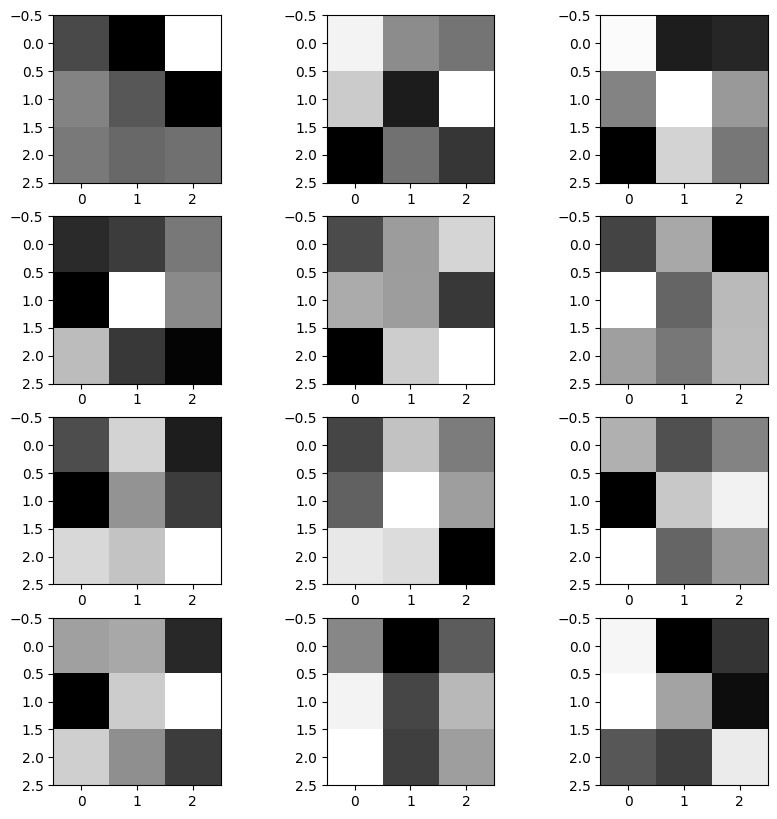

In [ ]:
#Visualisasi weight filter dari setiap layer
n_filters, ix =4, 1
fig = plt.figure(figsize=(10,10))
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j], cmap='gray')
        ix+=1
plt.show()

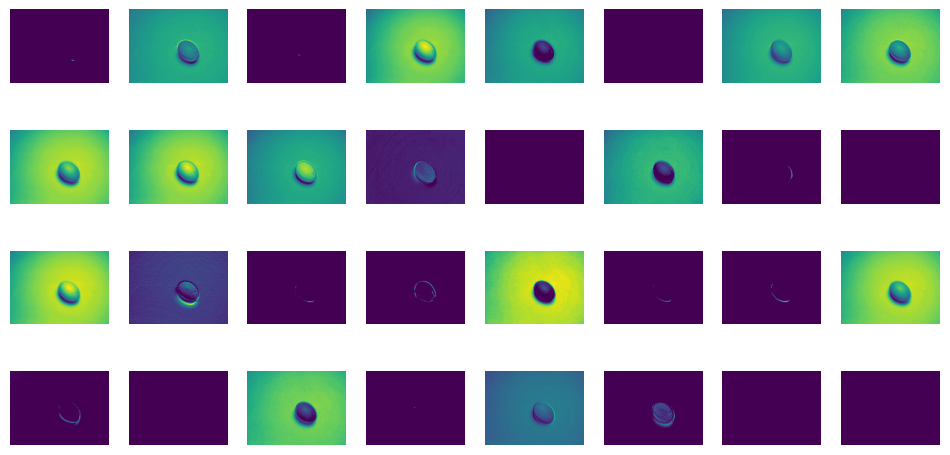

In [ ]:
#Visualisasi feature map

fig, axes = plt.subplots(4,8, figsize=(12,6))
for i, ax in enumerate(axes.flat):
  if i<64:
    ax.imshow(activation[:,:,i])
  ax.axis('off')

plt.show()

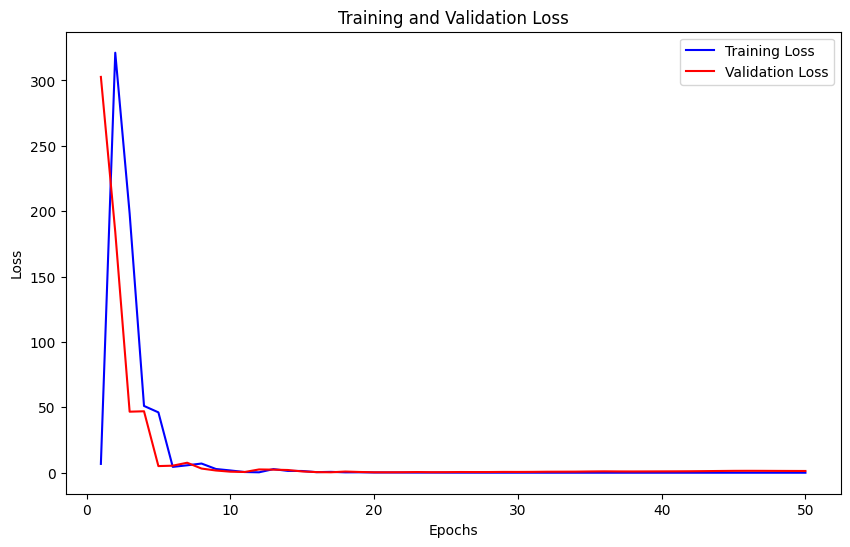

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

9/9 - 4s - loss: 1.2073 - accuracy: 0.8118 - 4s/epoch - 432ms/step


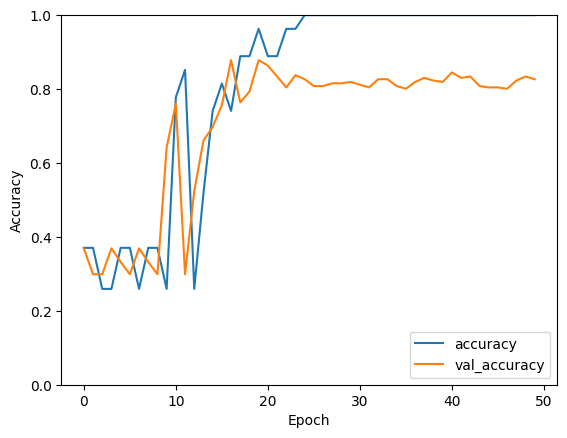

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(x_test,  y_test, verbose=2)

***6. Kesimpulan***

Model dengan pendekatan CNN yang telah dibuat dapat memprediksi kondisi telur pada data test dengan akurasi 81.18%.

 Dalam pengerjaan tugas ini, saya belajar untuk melakukan preprocessing dengan data gambar. Selain itu, saya juga belajar untuk menggunakan library keras yang digunakan untuk membuat architecture CNN dengan gambar. Tantangan terbesar dalam pekerjaan ini adalah memilih dan juga mencari library yang tepat digunakan untuk membuat model dengan gambar.

***Referensi***

https://deepai.org/machine-learning-glossary-and-terms/max-pooling

https://machinelearningknowledge.ai/pytorch-conv2d-explained-with-examples/

https://www.pluralsight.com/guides/convolutional-neural-network-in-keras